In [1]:
import pandas as pd

In [66]:
df = pd.read_csv('sentiments.csv')
df.head()

,package_name,review,polarity
0,com.facebook.katana,privacy at least put some option appear offli...,0
1,com.facebook.katana,"messenger issues ever since the last update, ...",0
2,com.facebook.katana,profile any time my wife or anybody has more ...,0
3,com.facebook.katana,the new features suck for those of us who don...,0
4,com.facebook.katana,forced reload on uploading pic on replying co...,0


In [67]:
df['review'][1]

" messenger issues ever since the last update, initial received messages don't get pushed to the messenger app and you don't get notification in the facebook app or messenger app. you open the facebook app and happen to see you have a message. you have to click the icon and it opens messenger. subsequent messages go through messenger app, unless you close the chat head... then you start over with no notification and having to go through the facebook app."

In [68]:
df['review'][100]

' down to 1 star after backward redesign this app design was perfectly adequate as of fall 2015, then one of these useless all new! redesigns was perpetrated.  now the old controls that let me manage the notification sound (silent, vibrate, etc.) are nowhere to be found.  had to turn off notifications totally to keep my phone quiet. that is unforgivably incompetent.  i find the overall design more confusing than prior layout, as many other reviewers do.   boo!  from 4 stars to 1.'

In [69]:
df = df.drop('package_name', axis=1)
df['review'] = df['review'].str.strip().str.lower()
df['review'][1]

"messenger issues ever since the last update, initial received messages don't get pushed to the messenger app and you don't get notification in the facebook app or messenger app. you open the facebook app and happen to see you have a message. you have to click the icon and it opens messenger. subsequent messages go through messenger app, unless you close the chat head... then you start over with no notification and having to go through the facebook app."

In [76]:
from sklearn.model_selection import train_test_split
X = df['review']
y = df['polarity']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=10)

In [77]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

count_vectorizer = CountVectorizer(stop_words='english')
# count_vectorizer = TfidfVectorizer(stop_words='english')
count_vectorizer = count_vectorizer.fit(X)
X_train = count_vectorizer.transform(X_train).toarray()
X_test = count_vectorizer.transform(X_test).toarray()


In [78]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf = clf.fit(X_train, y_train)

In [79]:
clf.score(X_test, y_test)

0.8251121076233184

In [85]:
review = ["best app."]
review = count_vectorizer.transform(review)
clf.predict(review)

array([1])

In [81]:
review = ["I am dissappointed by this app. I think it is terrible. This is like getting hit in the head."]
review = count_vectorizer.transform(review)
clf.predict(review)

array([0])

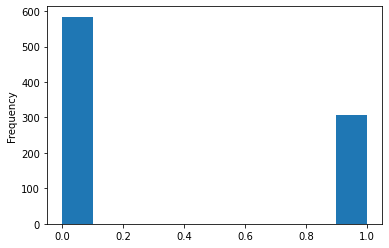

In [44]:
import matplotlib.pyplot as plt 
polarity = df['polarity']

_ = plt.figure()
polarity.plot.hist()
plt.show()